In [75]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 11})

In [76]:
def gridspacing_var_to_array(var, nz):
    L = 5e-3
    vars = np.array(['cmts', 'ch2', 'chcl','d','phi','xi'])
#          var_index= 0       1      2      3   4     5
    var_index = var
    which_var = str(vars[var_index])
    
    with open(r'/Users/jjmarzia/Desktop/cvisim/grid_spacing/jul3-nz/'+which_var+'/a1_'+str(nz)+'.txt','r') as file:
        data = file.read().split(' ')
        # print(data)
        i=0
        for i in range(len(data)):
            if '\n' in data[i]:
                data[i] = data[i].replace('\n', '')
            i=i+1
        # print(data)
        data = [i for i in data if i]
        data = np.array(data)
        data = data.astype(float)
    if var_index == 5:
        return np.linspace(0,L, 28), data, which_var
    else:
        return np.linspace(0,L, nz), data, which_var

In [77]:
def plot_allnz(var):
    fig, ax = plt.subplots(figsize = (5,2), layout='constrained')

    nzs = np.array([28, 52, 100, 200, 400, 800, 1000])
    i=0
    for i in range(len(nzs)):
        fsol = gridspacing_var_to_array(var,nzs[i])
        plt.plot(fsol[0], fsol[1],label=str(fsol[2])+' nz '+str(nzs[i]))
        i = i+1

    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.grid(True)
    # plt.ylim([0,1])

In [78]:
def plot_all_grids():
    plot_allnz(0)
    # plt.ylim([0,2])
    plot_allnz(1)
    # plt.ylim([0,2])
    plot_allnz(2)
    # plt.ylim([0,2])
    plot_allnz(3)
    plt.ylim([0,50e-6])
    plot_allnz(4)
    plt.ylim([0,100e-6])
    plot_allnz(5)
    plt.ylim([0,1])

In [79]:
def fit_points(var, coarsenz, finenz):
    coarse_grid = gridspacing_var_to_array(var, coarsenz)
    fine_grid = gridspacing_var_to_array(var, finenz)

    c_in_f = np.around(np.linspace(0,finenz-1,coarsenz))
    # print(c_in_f)
    f_c = []
    q=0
    for q in range(len(c_in_f)):
        f_c = np.append(f_c, fine_grid[1][round(c_in_f[q])])
        q+=1
    return f_c

In [80]:
def calc_norm(var, coarsenz, finenz):

    
    coarse_grid = gridspacing_var_to_array(var, coarsenz)
    if var==5:
        fine_grid = gridspacing_var_to_array(var, finenz)
    else:
        fine_grid = fit_points(var, coarsenz, finenz)
    norm_c_f = np.linalg.norm(fine_grid[1]-coarse_grid[1], np.inf)
    return norm_c_f

In [99]:
def calc_all_norms(var, finenz):
    nzs = np.array([28, 52, 100, 200, 400, 800])
    hs = 1/nzs
    n0 = calc_norm(var, nzs[0], finenz)
    n1 = calc_norm(var, nzs[1], finenz)
    n2 = calc_norm(var, nzs[2], finenz)
    n3 = calc_norm(var, nzs[3], finenz)
    n4 = calc_norm(var, nzs[4], finenz)
    n5 = calc_norm(var, nzs[5], finenz)
    norms = np.array([n0, n1, n2, n3, n4, n5])
    norm_slope = (n5-n0)/(hs[len(hs)-1]-hs[0])
    print(n1,n0)
    print(hs[1],hs[0])
    return hs, norms, norm_slope


In [105]:
# fig, ax = plt.subplots(figsize = (5.8,2.7), layout='constrained')
# ax.set_xscale("log")
# ax.set_yscale("log")

# a = calc_all_norms(1, 1000)


# plt.scatter(a[0],a[1],color='red')
# plt.grid(True)
# # plt.ylim(1e-4,1e-1)
# # plt.xlim(1e-4, 1e-1)

# print('norm_slope =',a[2])


# plot_all_grids()

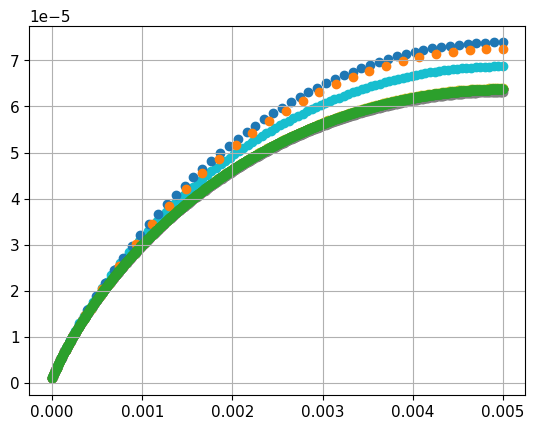

In [130]:
a1 = fit_points(4, 28, 1000)
a2 = fit_points(4, 52, 1000)
a3 = fit_points(4, 100, 1000)
a4 = fit_points(4, 200, 1000)
a5 = fit_points(4, 400, 1000)
a6 = fit_points(4, 800, 1000)

b = gridspacing_var_to_array(4, 1000)
c = gridspacing_var_to_array(4, 28)
d = gridspacing_var_to_array(4, 52)
f = gridspacing_var_to_array(4, 100)
g = gridspacing_var_to_array(4, 200)
h = gridspacing_var_to_array(4, 400)
j = gridspacing_var_to_array(4, 800)



plt.scatter(np.linspace(0,5e-3, len(a1)), a1)
plt.scatter(np.linspace(0,5e-3, len(a2)), a2)
plt.scatter(np.linspace(0,5e-3, len(a3)), a3)
plt.scatter(np.linspace(0,5e-3, len(a4)), a4)
plt.scatter(np.linspace(0,5e-3, len(a5)), a5)
plt.scatter(np.linspace(0,5e-3, len(a6)), a6)

plt.scatter(np.linspace(0,5e-3, len(j[1])), j[1])
plt.scatter(np.linspace(0,5e-3, len(h[1])), h[1])
plt.scatter(np.linspace(0,5e-3, len(g[1])), g[1])
plt.scatter(np.linspace(0,5e-3, len(f[1])), f[1])
plt.scatter(np.linspace(0,5e-3, len(d[1])), d[1])
plt.scatter(np.linspace(0,5e-3, len(c[1])), c[1])
plt.scatter(np.linspace(0,5e-3, len(b[1])), b[1])

plt.grid(True)
